# Welcome to the Data Workshop
---

## What is the goal of this workshop?

Through this workshop, you will learn the ropes of the complete process that a Data Scientist goes through in order to transform data into valuable knowledge.

### What data ?

Your input data will be a file containing daily information for customers' ticketing. From this data, we will extract different groups of customers with different habits.

### How ?

With this goal in mind, you will perform the following steps :<br/><br/>
1. Prepare the coding environment<br/>
2. Load the data into this python script<br/>
3. Prepare the data for future analysis<br/>
4. Explore the data to gain some general insights about it<br/>
5. Create useful features to characterize customers' habits<br/>
6. Run a machine learning model : K-Means algorithm<br/>
7. Find the optimal number of clusters<br/>

## How to use this notebook

This notebook is composed of cells :
- some cells contain textual explanations
- some cells contain code

You will advance in this notebook by reading the text cells and **running the code cells**. To run a code cell, you need to select it and hit the **&#9658; Run** button at the top.

**Some cells are incomplete ; you will need to complete them before running them**. 
<br/>These incomplete cells are explicitly marked with a    **# _--------------------------TO DO-------------------------_**    header.

## 1. Prepare the coding environment
---
Through this workshop, we will use some tools called libraries that will help us in our workflow.<br/>
<br />Libraries are powerful and efficient (fast) tools created by the python community that allow us to write very little code to perform complex actions. There are a lot of python libraries and we will only be using a few of them through this workshop:

|Library &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|Description &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|Usual acronym inside code &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
|:--|:--|:--|
|pandas|data manipulation and analysis library|pd|
|scikit-learn|machine learning library|sk|
|numpy|fast mathematical computation (used by pandas and many other libraries) library|np|
|seaborn|data visualization library|sns|
|matplotlib|plot library|plt|

Now let's import those libraries.

In [ ]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, ScalarFormatter)
import numpy as np

---
Our data is stored in Transdev's AWS servers.<br/> <br/>**Change the file_name with the file name you were given.<br/>The file_name format is : "example_name.csv" .**

<br/> The five available datasets are:
- ARF-LargeUrban.csv
- ARF-MedUrban.csv
- ARF-SmallUrban.csv
- ROM-MedUrban.csv
- LN-LargeUrban.csv

In [ ]:
# ----------------------TO DO----------------------
file_name = "TODO"

In [ ]:
file_name = file_name.strip()
print(file_name)
import io
import requests
url="https://translead-atelier.s3-eu-west-1.amazonaws.com/dev/" + file_name
s=requests.get(url).content

## 2. Load the data
---

Let's use pandas read_csv built-in function to load the data.

In [ ]:
data=pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter=",")

**Note :** the _data_ object will be used throughout the whole notebook. It is our main data container. 

---
Let's check what our data looks like.

In [ ]:
data

We have four columns :
>
>- customer_id is the id of the customer
>- date corresponds to the id of the stop where the user started his journey
>- tap_on_time is the day where the customer took the transport
>- stop is the time where the customer took the transport

## 3. Prepare the data for future analysis
---
<img style="float: right;" src="dropdown_excel.png">


<br/>Like with any dataset, every column corresponds to a certain type of object. We, humans, understand directly what the type of an object should be :
- 16/01/1997 is a date
- "hello world" is text
- 56°C is a measure of temperature

However, pandas (the library that we use to load the data) doesn't always correctly recognize the type of our columns. Therefore we might need to specify manually the type of columns to pandas : it's exactly the same thing as on excel software when we use the type drop down menu (see image beside this text).

Let's check the current type of our columns !

In [ ]:
data.info() 

Pandas didn't recognized our data types correctly. So far Pandas recognized : 

- _date_ and _tap_on_time_ as **object type** : object type means pandas **didn't understand** what our data is and assigned the default generic object type.<br/><br/>

- _stop_ as **int64 type** : int64 means pandas recognized the stops' column as **integers**. While this is true, the stop numbers we have correspond to IDs and we are not really interested into calculations such as mean, median, standard deviation on IDs. We are more interested about how many different stops there are, which stop has the most trips etc. _stop_ is in fact what we call a **categorical** data type compared to a **numerical** data type.<br/><br/>

- _customer_id_ is either recognized as object or int64 depending on the datasets


As a result, we will convert our columns to the following data types :
- _customer_id_ : a _customer_id_ is a categorical data rather than numeric so we will convert it to a **category object**.
- date : a specific type exists for dates, which is called **datetime**. We will use datetime for our dates' column.
- tap_on_time : a specific type exists for times, which is called **timedelta**. We will use timedelta for our times' column.
- stop : category object

**Let's make these changes.**

---
The following code changes the customer_id to a category type.

In [ ]:
data["customer_id"] = data["customer_id"].astype("category")

Complete the following cell to change the stop column to a category type.

**DON'T SKIP this step ! it is mandatory for the rest of the notebook to work.**

In [ ]:
# ----------------------TO DO----------------------


Fill in the column names in the following code. Remember to put double quotes " " around your column name, exactly as in the example above.

**DON'T SKIP this step ! it is mandatory for the rest of the notebook to work.**

In [ ]:
# ----------------------TO DO----------------------

data["TODO"] = pd.to_datetime(data["TODO"], format="%d/%m/%Y")
data["TODO"] = pd.to_timedelta(data["TODO"])

---
Check if our changes appear correctly by using the _info()_ function (example at beginning of section 3).

In [ ]:
# ----------------------TO DO----------------------


Thanks to our careful definition of what each column type should be, we will have a cleaner workflow in future steps.

## 4. Explore the data
---

### Some statistical indexes

Now we'll use the built-in function _describe_ (from pandas library) that gives general insights on our data.<br/><br/>
For categorical data and datetimes, _describe_ gives those information :
>- count : total number of non-empty values
>- unique : number of different values
>- top : value that appears the most
>- freq : number of times that the "top" value appears
>- _(only datetimes)_ first : smallest value
>- _(only datetimes)_ last : biggest value

For numerical data and timedeltas, _describe_ gives those information :
>- count : total number of non-empty values
>- mean
>- std : standard deviation
>- min : minimum value
>- 25% : first quartile
>- 50% : median
>- 75% : 3rd quartile
>- max : maximum value

---
How many different customers do we have ?

In [ ]:
data["customer_id"].describe()

---
How many different stops do we have ?

In [ ]:
# ----------------------TO DO----------------------


---
What is the first date in our dataset ? the last one ? How many unique days are there ?

In [ ]:
# ----------------------TO DO----------------------


---
On an average day, at what time are 25% of our validations done ? 50% ? 75% ?

In [ ]:
# ----------------------TO DO----------------------


Time isn't categorical, so _describe_ gives insights about mean, standard deviation, min value, max value, and quartiles.

### Some graphical insights

In our data, one row matches a single trip. As a result, plotting distributions requires few steps :
- group the rows per a criteria we are interested in
- count/sum/average (any operation) in each group
- plot the result

---
#### In the time period of our dataset, what is the number of customers per number of trips ?

Here is an example of how to plot a certain metric. Steps can vary depending on the metric.

In [ ]:
# This line focuses on the customer_id column, groups the rows that have the same id, and count the them for each id
num_trips_per_customer = data["customer_id"].groupby(data["customer_id"]).count()

# This shows the output
num_trips_per_customer

In [ ]:
# This line sets the plot size. You can ignore it.
plt.figure(figsize=(20,6))

# We group by the number of trips and count how many ids realized this number of trip.
monotone_trips = num_trips_per_customer.groupby(num_trips_per_customer.values).count()

# We plot the result
fig = monotone_trips.plot(kind="bar")
plt.xlabel("number of trips")
plt.ylabel("number of customers")
fig.xaxis.set_major_locator(MultipleLocator(5))
fig.xaxis.set_major_formatter(ScalarFormatter())
xticks = fig.set_xticklabels([1] + list(range(1,monotone_trips.max(),5)))

Customers' percentage per trips number sorted in descending order

In [ ]:
(monotone_trips / monotone_trips.sum() * 100).sort_values(ascending=False).round(2).head(20)

---
#### In the time period of our dataset, what is the number of customers per number of different origins (stops) ?

In [ ]:
# This line sets the plot size. You can ignore it.
plt.figure(figsize=(20,6))

# For each customer, we get their trips and count the number of unique stops thanks to nunique function
num_origins_per_customer = data["stop"].groupby(data["customer_id"]).nunique()

# For each number of unique stops, we count the number of customers
num_customers_per_origin = num_origins_per_customer.groupby(num_origins_per_customer.values).count()

fig = num_customers_per_origin.plot(kind="bar")

plt.xlabel("number of unique origins (stops)")
plt.ylabel("number of customers")
fig.xaxis.set_major_locator(MultipleLocator(5))
fig.xaxis.set_major_formatter(ScalarFormatter())
xticks = fig.set_xticklabels([1] + list(range(1,num_customers_per_origin.max(),5)))

Customers' percentage per unique origins number sorted in descending order

In [ ]:
(num_customers_per_origin / num_customers_per_origin.sum() * 100).sort_values(ascending=False).round(2).head(20)

---
#### What is the distribution of trips across time ?

In [ ]:
# This line sets the plot size. You can ignore it.
plt.figure(figsize=(10,6))

commutes_per_hour = data["tap_on_time"].groupby(data["tap_on_time"].dt.components['hours']).count()
commutes_per_hour.plot(kind="bar")
plt.xlabel("hour of the day")
plt.ylabel("total number of trips")

**Percentage values :**

In [ ]:
(commutes_per_hour / commutes_per_hour.sum() * 100).sort_values(ascending=False).round(2).head(24)

**Midday trips percentage :**

In [ ]:
(commutes_per_hour[[12,13,14]].sum() / commutes_per_hour.sum() * 100).round(2)

**Peak hour trips percentage :**

Complete the following cell to show the percentage of trips that are done during peak hours (7h - 8h and 16h - 19h usually).

In [ ]:
# ----------------------TO DO----------------------


---
#### What is the distribution of trips across dates ?

Plot the distribution of trips across dates .

If you don't find the answer to this question, **don't worry it is not mandatory** to continue the notebook.

In [ ]:
# ----------------------TO DO----------------------






---
#### How are trips distributed among different stops ?

In [ ]:
plt.figure(figsize=(10,6))
trips_per_stop = data["stop"].groupby(data["stop"]).count()
stops_plot = trips_per_stop.plot(kind="bar")
plt.xticks([]) # REMOVE X AXIS TICKS BECAUSE THERE ARE TOO MANY STOPS AND THE TEXT OVERLAPS
plt.xlabel("stop id")
plt.ylabel("number of trips")

**Percentage values :**

In [ ]:
(trips_per_stop / trips_per_stop.sum() * 100).round(2).sort_values(ascending=False).head(20)

#### How are trips distributed along the days of the week ?

This plot is a little bit more tricky than the previous examples for two reasons :
- we don't have a column that stores which day of the week corresponds to the date.
- we might have an uneven number of complete weeks. For example, if we have 23 days of data, 23/7 = 3 weeks + 2 days. For two certain days of the week, we will have more data than for others. We will need to take that into account when computing the mean per day.

In [ ]:
plt.figure(figsize=(10,6))
data['day_of_week'] = pd.Categorical(data['date'].dt.day_name(), categories=[
                                     'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                     ordered=True)
grouped_data_per_date = data[["day_of_week"]].groupby(data["date"]).first()
grouped_data_per_date["trips_count"] = data["day_of_week"].groupby(data["date"]).count()
mean_trips_per_day = grouped_data_per_date["trips_count"].groupby(grouped_data_per_date["day_of_week"]).mean()
mean_trips_per_day.plot(kind="bar")
plt.ylabel("average number of trips")

**Percentage values :** 

In [ ]:
(mean_trips_per_day / mean_trips_per_day.sum() * 100).sort_values(ascending=False).round(2).head(7)

**Weekday trips percentage :**

In [ ]:
(mean_trips_per_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum() / mean_trips_per_day.sum() * 100).round(2)

## 5. Create useful features to characterize customers' habits
---

Now let's dive into the final goal of this workshop : identifying different groups of customers thanks to a clustering algorithm, K-Means. First let's get an intuition of how K-Means work.

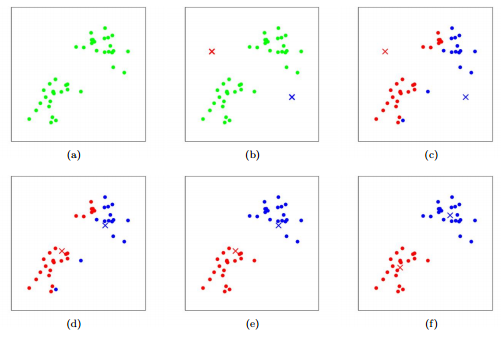


K-Means performs the following steps :

<img style="float: right; width:140px;" src="step a kmeans.PNG">

 **step a)**
 >We have some data points in a 2D plane. They all have x and y coordinates. 
<br/> <br/><br/> <br/><br/> <br/>
<img style="float: right; width:140px;" src="step b kmeans.PNG">

**step b)** 
>- We want to cluster our data into two groups so we chose K = 2.
>- Since we chose K = 2, we place 2 random points in our 2D plane : a red cross and a blue cross. These 2 points are called **centroids**.
<br/> <br/><br/> <br/><br/> <br/>
<img style="float: right; width:140px;" src="step c kmeans.PNG">

**step c)**
>We associate each **data point** to the **closest centroid**. Data points closest to the red cross are marked as red points, and data points closest to the blue cross are marked as blue points.
<br/> <br/><br/> <br/><br/> <br/>
<img style="float: right; width:140px;" src="step d kmeans.PNG">

**step d)**
>We calculate **new positions for our centroids**. The **new red centroid** will be the **center of the red points** and the **new blue centroid** will be the **center of the blue points**.
<br/> <br/><br/> <br/><br/> <br/>
<img style="float: right; width:140px;" src="step e kmeans.PNG">

**step e)**
>We **repeat step c)**. We associate each data point to the closest centroid. **Some points will remain the same color, but others will change** of color because they are now closer to the other cross.
<br/> <br/><br/> <br/><br/> <br/>
<img style="float: right; width:140px;" src="step f kmeans.PNG">

**step f)**
>We **repeat step d)**. We calculate new positions for our centroids again.

**etc. etc.**

We stop this process when the centroids' positions don't change anymore : it means we reached convergence (to a local optimum not a global optimum).

---
### How do we apply K-Means clustering to our data ?
In the previous K-Means drawings, two different groups are clearly identifiable : this means that the x and y axis are **useful, meaningful features** to distinguish a red point from a blue point.

#### In our case, we want to cluster public transportation customers : what features could be useful and meaningful to distinguish a customer from another ?

In the clustering that you will perform, you will use the following criteria to discriminate customers. For each customer, we will use :
- ratio between his trips on weekdays and his total trips
- ratio between his trips in peak hours (7h-8h and 16h-19h) and his weekdays trips
- number of different stops where he validated 
- his number of trips : for example, someone has made 10 trips in one month
- a ratio representing the interval between trips. If this ratio is close to 1, the person travels almost every day. If it's close to 0, the person doesn't travel often. For example, 0.2 means the person travels 2 days out of 10.

We don't have those indicators in our data ; therefore we need to **build them from the original data we have**.

#### Add new booleans (0 or 1) columns to our original _data_ object

The following code defines two functions that tell whether a day is a weekday and whether an hour is a peak hour.<br/>
We build two new columns in our data thanks to these functions.

In [ ]:
def is_weekday(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 1
    else:
        return 0


data["is_weekday"] = data["day_of_week"].apply(lambda day: is_weekday(day))

def is_peak_hour(row):
    tap_on_time = row["tap_on_time"].components.hours
    is_weekday_bool = row["is_weekday"]
    if is_weekday_bool == 1:
        if 7 <= tap_on_time <= 8 or 16 <= tap_on_time <= 19:
            return 1
        else:
            return 0
    else:
        return 0

data["is_peak_hour"] = data[["tap_on_time", "is_weekday"]].apply(
    lambda row: is_peak_hour(row), axis=1)

In [ ]:
data

#### Create a dataframe where we will store data for each customer
---
Let's create a new dataframe called _customer_data_ to store data relative to each customer. This dataframe contains **1 row per customer** compared to **the original data which had 1 row per validation**. 

In [ ]:
customer_data = pd.DataFrame()
customer_data["customer_id"] = data["customer_id"].drop_duplicates().array
customer_data

Now we have a dataframe with only customers ids. Let's add the ratio between a customer's trips on weekdays and his total trips.

In [ ]:
customer_weekday_weekend_ratios = data["is_weekday"].groupby(data["customer_id"]).mean()
customer_weekday_weekend_ratios = customer_weekday_weekend_ratios.rename("weekday_ratio")
customer_data = pd.merge(customer_data, customer_weekday_weekend_ratios, on="customer_id")

Let's add the ratio between a customer's trips in peak hours and his total trips.

In [ ]:
customer_peak_hour_ratios = data["is_peak_hour"].groupby(data["customer_id"]).sum() / data["is_weekday"].groupby(data["customer_id"]).sum()
customer_peak_hour_ratios = customer_peak_hour_ratios.fillna(0)
customer_peak_hour_ratios = customer_peak_hour_ratios.rename("peak_hour_ratio")
customer_data = pd.merge(customer_data, customer_peak_hour_ratios, on="customer_id")

Let's add a column representing customers' number of unique origins (stops).

In [ ]:
unique_stops_count = data["stop"].groupby(data["customer_id"]).nunique()
unique_stops_score = unique_stops_count.rename("unique_stops")
customer_data = pd.merge(customer_data, unique_stops_score, on="customer_id")

Let's add a column representing customers' number of trips.

In [ ]:
number_of_trips = data["customer_id"].groupby(data["customer_id"]).count()
number_of_trips = number_of_trips.rename("num_trips")
customer_data = pd.merge(customer_data, number_of_trips, on="customer_id")

Let's add a ratio representing a customer's interval between his trips.

In [ ]:
customer_dates = data["date"].groupby(data["customer_id"])
days_travelled_total_days_ratios = customer_dates.nunique() / ((customer_dates.max() - customer_dates.min()).dt.days + 1)
days_travelled_total_days_ratios = days_travelled_total_days_ratios.rename("days_travelled_ratio")
customer_data = pd.merge(customer_data, days_travelled_total_days_ratios, on="customer_id")

Check our new data.

In [ ]:
customer_data

## 6. Run a machine learning model : K-Means algorithm
---

### Keep customers with at least 3 trips

Customers with only 1 or 2 trips bias our clusters because they are not representative of a general behavior. As a result we only keep customers with at least 3 trips for our clustering.

In [ ]:
customer_data_no_outliers = customer_data[customer_data["num_trips"] >= 3]

---
### Standardize our data

K-Means algorithm uses the distance between customers to cluster them. The distance between two users is defined as:<br/><br/>
\begin{aligned}d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.\end{aligned}
	
<br/>

where q1, q2 ... qn are customers' features (ratios, number of trips ...).

Our _customer_data_ contains ratios between 0 and 1 but also higher numbers like 12, 20, 40 describing number of trips and origins.<br/>
These higher number will **weight much more** than ratios in the sum. As a result, we need to **standardize our data**, so that each feature has an equal weight.<br/><br/>
Standardization formula is:

<img src="https://latex.codecogs.com/gif.latex?newColumn&space;=&space;\frac{Column&space;-&space;mean(Column)}{standardDeviation(Column)}" title="newColumn = \frac{Column - mean(Column)}{standardDeviation(Column)}" />

This formula implies that values below the mean will become negative values. Don't be scared to see negative values after the standardization it's totally normal.

Finally, in the following code cell, **we use a more robust version of standardization for our use case**: it is the same formula where we replace the mean by the **median** and the standard deviation by the **median absolute deviation** (which is the equivalent of the standard deviation but using the median instead of the mean). Our formula is:

<img src="https://latex.codecogs.com/gif.latex?newColumn&space;=&space;\frac{Column&space;-&space;median(Column)}{medianAbsoluteDeviation(Column)}" title="newColumn = \frac{Column - median(Column)}{medianAbsoluteDeviation(Column)}" />
<br/><br/>
This allows to reduce the impact of outliers, especially those with high numbers. For example, if we have 5 users' number of trips :

|User &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|User 1 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|User 2 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|User 3 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|User 4 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|User 5 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
|:--|:--|:--|:--|:--|:--|
|Number of trips|3|5|4|5|20|
|Mean| 7.4 : this value isn't really representative of people's behavior|
|Median| 5 : this value is much more accurate|

In our data, this phenomena is particularly true because our distributions contain much more small values than big values: we say that our distributions are **skewed right**.

No more talking, let's continue !

In [ ]:
from scipy import stats

temp = customer_data_no_outliers.loc[:, customer_data_no_outliers.columns != 'customer_id']

# Filter outliers
customer_data_no_outliers = customer_data_no_outliers[(np.abs((temp-temp.median())/temp.mad()) < 5).all(axis=1)]

customer_data_no_outliers = customer_data_no_outliers.reset_index()

# Remove the customer_id which isn't a feature for the kmeans_clustering
kmeans_data = customer_data_no_outliers.loc[:, customer_data_no_outliers.columns != 'customer_id']

# Standardize our data
kmeans_data = (kmeans_data - kmeans_data.median()) / kmeans_data.mad()
kmeans_data.info()

In [ ]:
kmeans_data

### Run K-Means on our data
---

Guess the number of cluster and fill in the _chosen_k_.

In [ ]:
# ----------------------TO DO----------------------
chosen_k = 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=chosen_k).fit(kmeans_data)

# Assign clusters to our data
customer_data_no_outliers.loc[:,"cluster"] = kmeans.labels_

Show our data with assigned clusters.

In [ ]:
customer_data_no_outliers

### Graphical representation of our results
---

Show the number of customers per cluster.

In [ ]:
plt.figure(figsize=(10,6))
clusters_size = customer_data_no_outliers["cluster"].groupby(customer_data_no_outliers["cluster"]).count()
plt.bar(list(range(1,chosen_k+1,1)),clusters_size)

**Percentage of each cluster :**

In [ ]:
(clusters_size / clusters_size.sum() * 100).round(2).head(chosen_k)

We have 5 criteria ; so technically to visualize our clusters, we would need to plot the results in a 5 dimensional space. Since a 5-dimensional space isn't viewable and understandable by humans being, we will plot our data on two new axis which are a mixture of the different columns. 

Both x and y axis show a fraction of the information contained in the 5 dimensions. We show this percentage in our plot labels to determine if our plot is representative of our data or not.

Now, let's visualize our clusters.

In [ ]:
plt.figure(figsize=(10,6))
pca = sk.decomposition.PCA(3)
projected = pca.fit_transform(kmeans_data)
plt.scatter(projected[:, 0], projected[:, 1],
            c=customer_data_no_outliers.cluster, s = 0.5)
info_percentages = pca.explained_variance_ratio_
plt.xlabel('component 1: ' + str((info_percentages[0] * 100).round(2)) + " % of the info in our data")
plt.ylabel('component 2: ' + str((info_percentages[1] * 100).round(2)) + " % of the info in our data")
plt.colorbar()

Now in 3-D !

In [ ]:
import plotly.express as px
projected = pd.DataFrame(projected)
projected
fig = px.scatter_3d(projected, x=0, y=1, z=2, color=customer_data_no_outliers.cluster)
fig.update_traces(marker=dict(size=1),
                  selector=dict(mode='markers'))
fig.update_layout(
    title="Clusters 3D visualization",
    scene = dict(
    xaxis_title='X: ' + str((info_percentages[0] * 100).round(2)) + " % info",
    yaxis_title='Y: ' + str((info_percentages[1] * 100).round(2)) + " % info",
    zaxis_title='Z: ' + str((info_percentages[2] * 100).round(2)) + " % info"),
    font=dict(
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

## 7. Find the optimal number of clusters
---

### Run K-Means on 2 to 10 clusters on the data

The **inertia of a cluster** is the sum of the distances of each point of this cluster to the centroid of this cluster.

The inertia tends to decrease toward 0 as we increase k (the inertia is 0 when k = number_of_customers, because then each customer is its own cluster, and there is no distance between it and his centroid as he is the centroid). 

So our goal is to **choose a small value of k that still has a low inertia**.

The following loop runs K-Means for 2 to 10 clusters. Each time it stores the average inertia of our clusters.

In [ ]:
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
from sklearn.metrics import silhouette_score
inertias = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(kmeans_data) 
    inertias.append(kmeans.inertia_)

---
### Plot the result and choose the optimal K number of clusters

Now we can visualize how the inertia evolves across time. 

The elbow in the curve usually represents where we start to have diminishing returns by increasing k.

In [ ]:
plt.plot(list(range(2,kmax+1)),inertias)

---
### Input the chosen optimal number of clusters and see the results

Input your chosen ideal number of clusters.

In [ ]:
# ----------------------TO DO----------------------
chosen_k = 

In [ ]:
kmeans = KMeans(n_clusters=chosen_k).fit(kmeans_data)
customer_data_no_outliers.loc[:,"cluster"] = kmeans.labels_

---
### Graphical representation of our results

Show the number of customers per cluster.

In [ ]:
plt.figure(figsize=(10,6))
clusters_size = customer_data_no_outliers["cluster"].groupby(customer_data_no_outliers["cluster"]).count()
plt.bar(list(range(1,chosen_k+1,1)),clusters_size)

**Percentage of each cluster :**

In [ ]:
(clusters_size / clusters_size.sum() * 100).round(2).head(chosen_k)

**Now, let's compare our clusters with boxplots.**

A boxplot is a way to show a five number summary in a chart :

>- The main part of the chart (the “box”) shows where the middle portion of the data is: the interquartile range. 
>- At the end of the box, you” find the first quartile (the 25% mark) and the third quartile (the 75% mark). 
>- The far left of the chart (at the end of the left “whisker”) is the minimum (the smallest number in the set) and the far right is the maximum (the largest number in the set). 
>- Finally, the median is represented by a vertical bar in the center of the box. 

In [ ]:
f, axes = plt.subplots(2,3,figsize=(15, 10))

# plt.figure(figsize=(15,15))

sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["num_trips"], showfliers = False,ax=axes[0,0])
sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["unique_stops"], showfliers = False,ax=axes[0,1])
sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["weekday_ratio"], showfliers = False,ax=axes[0,2])
sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["peak_hour_ratio"], showfliers = False,ax=axes[1,0])
sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["days_travelled_ratio"], showfliers = False,ax=axes[1,1])

plt.show()

Show distributions for each cluster.

In [ ]:
fig = plt.figure(figsize=(20,20))
num_metrics = 4

for k in range(0,chosen_k):
    
    k_data = data.loc[data.customer_id.isin(customer_data_no_outliers.loc[customer_data_no_outliers.cluster == k,"customer_id"].values),:]
    plot1 = plt.subplot(num_metrics,chosen_k,k+1)
    trips_per_day = k_data["day_of_week"].groupby(k_data["day_of_week"]).count()
    trips_per_day.plot(kind="bar")
    plot1.set(ylabel = "number of customers")
    
    plot2 = plt.subplot(num_metrics,chosen_k,k+1+chosen_k)
    trips_per_time = k_data["tap_on_time"].groupby(k_data["tap_on_time"].dt.components['hours']).count()
    trips_per_time = trips_per_time
    trips_per_time.plot(kind="bar")
    plot2.set(ylabel = "number of customers")

    plot3 = plt.subplot(num_metrics,chosen_k,k+1+2*chosen_k)
    plot3.set_yscale('log')
    num_trips_per_customer = k_data["customer_id"].groupby(k_data["customer_id"]).count()
    num_cust_per_trips_num = num_trips_per_customer.groupby(num_trips_per_customer.values).count()
    num_cust_per_trips_num = num_cust_per_trips_num.drop(labels=0)
    num_cust_per_trips_num.plot(kind="bar")
    plot3.set(xlabel="number_of_trips")
    plot3.set(ylabel = "log scale : number of customers")
    plot3.get_xaxis().set_major_locator(MultipleLocator(10))
    plot3.get_xaxis().set_major_formatter(ScalarFormatter())
    plot3.set_xticklabels([1] + list(range(1,num_cust_per_trips_num.max()+1,10)))
    
    plot4 = plt.subplot(num_metrics,chosen_k,k+1+3*chosen_k)
    plot4.set_yscale('log')
    num_origins_per_customer = k_data["stop"].groupby(k_data["customer_id"]).nunique()
    num_cust_per_ori_num = num_origins_per_customer.groupby(num_origins_per_customer.values).count()
    num_cust_per_ori_num = num_cust_per_ori_num.drop(labels=0)
    num_cust_per_ori_num.plot(kind="bar")
    plot4.set(xlabel="number_of_origins")
    plot4.set(ylabel = "log scale : number of customers")
    plot4.get_xaxis().set_major_locator(MultipleLocator(10))
    plot4.get_xaxis().set_major_formatter(ScalarFormatter())
    plot4.set_xticklabels([1] + list(range(1,num_cust_per_ori_num.max()+1,10)))

plt.show()

Visualize our clusters in a 2-dimensional space.

In [ ]:
plt.figure(figsize=(10,6))
pca = sk.decomposition.PCA(3)
projected = pca.fit_transform(kmeans_data)
plt.scatter(projected[:, 0], projected[:, 1],
            c=customer_data_no_outliers.cluster, s = 0.5)
info_percentages = pca.explained_variance_ratio_
plt.xlabel('component 1: ' + str((info_percentages[0] * 100).round(2)) + " % of the info in our data")
plt.ylabel('component 2: ' + str((info_percentages[1] * 100).round(2)) + " % of the info in our data")
plt.colorbar()

Now in 3-D !

In [ ]:
import plotly.express as px
projected = pd.DataFrame(projected)
projected
fig = px.scatter_3d(projected, x=0, y=1, z=2, color=customer_data_no_outliers.cluster)
fig.update_traces(marker=dict(size=1),
                  selector=dict(mode='markers'))
fig.update_layout(
    title="Clusters 3D visualization",
    scene = dict(
    xaxis_title='X: ' + str((info_percentages[0] * 100).round(2)) + " % info",
    yaxis_title='Y: ' + str((info_percentages[1] * 100).round(2)) + " % info",
    zaxis_title='Z: ' + str((info_percentages[2] * 100).round(2)) + " % info"),
    font=dict(
        size=12,
        color="#7f7f7f"
    )
)
fig.show()